# 深度学习基础

## 2. 数据增强(Data Augmentaion)：举一反三造数据


使用 ImageDataGenerator 来设置数据增强
* rotation_range 是角度值(在 0~180 范围内)，表示图像随机旋转的角度范围。
* width_shift 和 height_shift 是图像在水平或垂直方向上平移的范围(相对于总宽
度或总高度的比例)。
* shear_range 是随机错切变换的角度。
* zoom_range 是图像随机缩放的范围。
* horizontal_flip 是随机将一半图像水平翻转。如果没有水平不对称的假设(比如真
实世界的图像)，这种做法是有意义的。
* fill_mode 是用于填充新创建像素的方法，这些新像素可能来自于旋转或宽度 / 高度平移。 我们来看一下增强后的图像(见图 5-11)。

In [1]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Using TensorFlow backend.


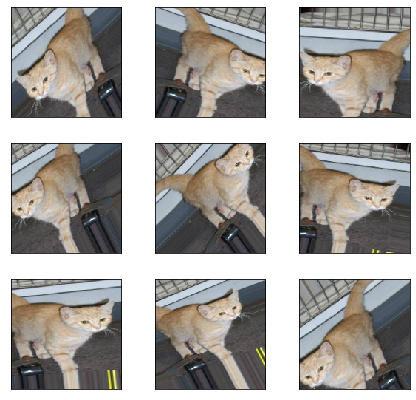

In [3]:
from keras.preprocessing import image

import os
import matplotlib.pyplot as plt

train_cat_dir = 'data/train/cat'
fnames = [f'{train_cat_dir}/{fname}'
          for fname in os.listdir(train_cat_dir)]

img_path = fnames[100]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

# 绘制9张随机增强后的图像
fig = plt.figure(figsize=(6,6))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    plt.subplot(3,3, i+1)
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(image.array_to_img(batch[0]))    
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记
    if i == 8:
        break

plt.show()

## 构建新模型

In [4]:
from keras import models, layers, optimizers

model = models.Sequential() 

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 

# 在全连接前新增 Dropout 层
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=test_generator,
    validation_steps=50)

Epoch 1/30
50/50 [==============================] - 51s 1s/step - loss: 0.7026 - acc: 0.4894 - val_loss: 0.6932 - val_acc: 0.4994
Epoch 2/30
50/50 [==============================] - 54s 1s/step - loss: 0.6884 - acc: 0.5363 - val_loss: 0.6911 - val_acc: 0.4981
Epoch 3/30
50/50 [==============================] - 61s 1s/step - loss: 0.6937 - acc: 0.5387 - val_loss: 0.6795 - val_acc: 0.6256
Epoch 4/30
50/50 [==============================] - 62s 1s/step - loss: 0.6851 - acc: 0.5450 - val_loss: 0.6684 - val_acc: 0.6192
Epoch 5/30
50/50 [==============================] - 57s 1s/step - loss: 0.6834 - acc: 0.5643 - val_loss: 0.6678 - val_acc: 0.5990
Epoch 6/30
50/50 [==============================] - 61s 1s/step - loss: 0.6747 - acc: 0.5769 - val_loss: 0.6571 - val_acc: 0.6218
Epoch 7/30
50/50 [==============================] - 58s 1s/step - loss: 0.6705 - acc: 0.5825 - val_loss: 0.6649 - val_acc: 0.5806
Epoch 8/30
50/50 [==============================] - 54s 1s/step - loss: 0.6648 - acc: 0.59

In [33]:
model.save('cats_and_dogs_small_2.h5')

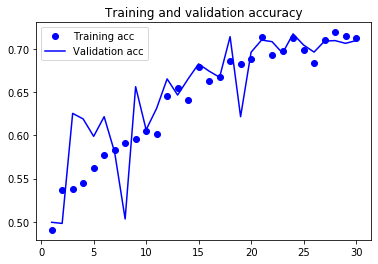

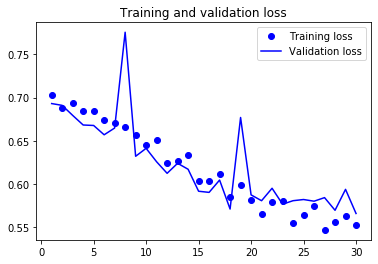

In [34]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.legend()
    
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()